In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tabulate as tab

%matplotlib inline
mpl.rcParams['lines.linewidth'] = 2

N=1000
IN = 0.25 * N
F=2
np.random.seed(1)
X = np.random.randn(N,F)
beta = np.repeat(0.5, F)
beta2 = beta.copy()
beta2[-1] = 0
eps = np.random.randn(N) * 0.1#625
Y = X.dot(beta) + eps
Y_2 = X.dot(beta2) + eps

np.random.seed(0)
N=1000
IN = 0.25 * N
F = 6
X_wide = np.random.randn(N,F)
beta = np.repeat(0.5, F)
beta2 = beta.copy()
beta2[-3:] = 0
eps = np.random.randn(N) * 0.1#625
Y_wide = X_wide.dot(beta) + eps
Y_2_wide = X_wide.dot(beta2) + eps



In [17]:
beta
beta2

array([ 0.5,  0.5,  0.5,  0. ,  0. ,  0. ])

In [1]:
def print_stats(X_in, X_out, Y_in, Y_out, lambdas_to_test =[0, 0.5, 1.0, 2.5, 5.0, 7.5, 10.0, 25, 50, 100, 99999999]):
    def my_inv(x):
        if len(x.shape) == 1:
            return 1/x
        else:
            return np.linalg.inv(x)
        
    num_indep = X_in.shape[1]
    res = [['Lambda'] + ['Beta_{}'.format(i) for i in range(num_indep)] + ['InMSE','OutMSE'] + ['Bias{}'.format(i) for i in range(num_indep)]
           + ['Var{}'.format(i) for i in range(num_indep)] + ['EDof']]
    variance0 = np.diag(np.var(eps) * my_inv(X_in.T.dot(X_in)))
    for lambda_ in lambdas_to_test:
        t1 = my_inv(X_in.T.dot(X_in) + lambda_ * np.eye(num_indep)).dot(X_in.T)
        hat = X_in.dot(t1)
        beta_ridge = t1.dot(Y_in)
        z = my_inv(X_in.T.dot(X_in) + lambda_ * np.eye(num_indep))
        bias = -lambda_ * z.dot(beta_ridge)
        variance = (np.var(eps) * z.dot(X_in.T.dot(X_in)).dot(z))
        variance = np.diag(variance)
        b_and_v = np.sum(bias**2) + np.sum(variance**2)
        
        in_err = X_in.dot(beta_ridge) - Y_in
        in_mse = in_err.T.dot(in_err)/X_in.shape[0]
        out_err = X_out.dot(beta_ridge) - Y_out
        out_mse = out_err.T.dot(out_err)/X_out.shape[0]
        
        res.append([lambda_] + list(beta_ridge) + [in_mse, out_mse] + list(bias) + list(variance) + [np.trace(hat)])
    
    plt.figure()
    plt.title('Betas vs Lambda')
    plt.xlabel('Lambda')
    plt.ylabel('Beta')
    plt.gca().set_xscale("log", nonposx='clip')
    for i in range(num_indep):
        plt.plot([x[0] for x in res[1:]], [x[i+1] for x in res[1:]], label='beta{}'.format(i))
    plt.legend()
    
    plt.figure()
    plt.title('Bias + Variance')
    plt.xlabel('Lambda')
    plt.ylabel('Bias + Variance')
    plt.gca().set_xscale("log", nonposx='clip')
    biases = [np.sum(np.array(x)[(3+num_indep):(3+2*num_indep)]**2) for x in res[1:-2]]
    variances = [np.sum(np.array(x)[(3+2*num_indep):(3+3*num_indep)]) for x in res[1:-2]]
    x_vals = [x[0] for x in res[1:-2]]
    plt.plot(x_vals, biases, label='Bias')
    plt.plot(x_vals, variances, label='Variance')
    plt.plot(x_vals, np.array(biases) + variances, label='Bias + Variance')
    plt.legend()

    plt.figure()
    plt.title('Mean Squared Error')
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.gca().set_xscale("log", nonposx='clip')
#     plt.gca().set_yscale("log", nonposx='clip')
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.plot([x[0] for x in res[1:-2]], [x[1+num_indep] for x in res[1:-2]], label='In Sample MSE')
    plt.plot([x[0] for x in res[1:-2]], [x[2+num_indep] for x in res[1:-2]], label='Out of Sample MSE')
    plt.legend()
    
    
    z = (tab.tabulate(res, headers='firstrow', numalign='right', stralign='right', tablefmt='grid', floatfmt='.4f')) 
    print(z)
    

+---------------+----------+----------+---------+----------+---------+---------+--------+--------+--------+
|        Lambda |   Beta_0 |   Beta_1 |   InMSE |   OutMSE |   Bias0 |   Bias1 |   Var0 |   Var1 |   EDof |
+===============+==========+==========+=========+==========+=========+=========+========+========+========+
|        0.0000 |   0.5122 |   0.4877 |  0.0088 |   0.0100 |  0.0000 |  0.0000 | 0.0000 | 0.0000 | 2.0000 |
+---------------+----------+----------+---------+----------+---------+---------+--------+--------+--------+
|        0.5000 |   0.5110 |   0.4867 |  0.0088 |   0.0100 | -0.0011 | -0.0010 | 0.0000 | 0.0000 | 1.9959 |
+---------------+----------+----------+---------+----------+---------+---------+--------+--------+--------+
|        1.0000 |   0.5099 |   0.4857 |  0.0088 |   0.0100 | -0.0023 | -0.0021 | 0.0000 | 0.0000 | 1.9918 |
+---------------+----------+----------+---------+----------+---------+---------+--------+--------+--------+
|        2.5000 |   0.5065 |

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


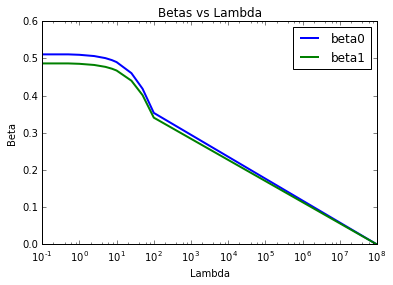

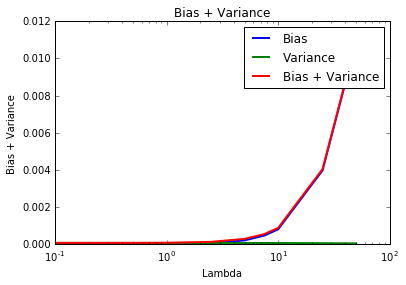

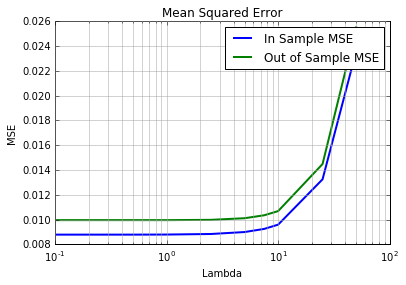

In [3]:
print_stats(X[:IN,], X[IN:,], Y[:IN,], Y[IN:])  

+---------------+----------+----------+---------+----------+---------+---------+--------+--------+--------+
|        Lambda |   Beta_0 |   Beta_1 |   InMSE |   OutMSE |   Bias0 |   Bias1 |   Var0 |   Var1 |   EDof |
+===============+==========+==========+=========+==========+=========+=========+========+========+========+
|        0.0000 |   0.5122 |  -0.0123 |  0.0088 |   0.0100 |  0.0000 |  0.0000 | 0.0000 | 0.0000 | 2.0000 |
+---------------+----------+----------+---------+----------+---------+---------+--------+--------+--------+
|        0.5000 |   0.5111 |  -0.0123 |  0.0088 |   0.0099 | -0.0011 | -0.0000 | 0.0000 | 0.0000 | 1.9959 |
+---------------+----------+----------+---------+----------+---------+---------+--------+--------+--------+
|        1.0000 |   0.5100 |  -0.0124 |  0.0088 |   0.0099 | -0.0021 | -0.0001 | 0.0000 | 0.0000 | 1.9918 |
+---------------+----------+----------+---------+----------+---------+---------+--------+--------+--------+
|        2.5000 |   0.5069 |

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


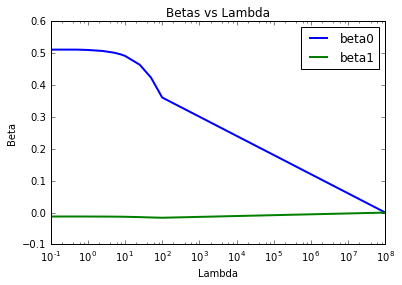

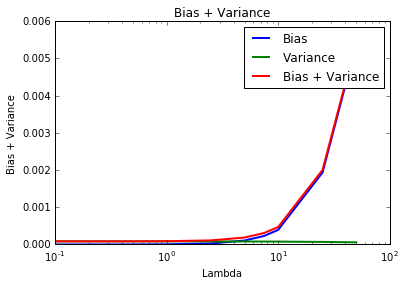

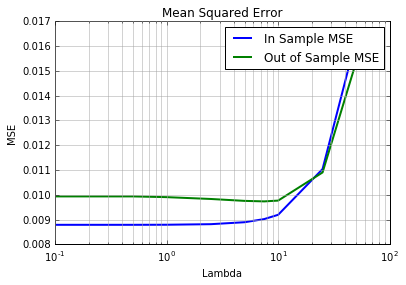

In [4]:
print_stats(X[:IN,], X[IN:,], Y_2[:IN,], Y_2[IN:])                                   

In [13]:
pd.DataFrame(Y).describe()
pd.DataFrame(Y).describe()

,0
count,1000.000000
mean,0.030852
std,0.703526
min,-2.439576
25%,-0.467711
50%,0.049483
75%,0.506057
max,2.115035


+----------+----------+----------+----------+----------+----------+----------+---------+----------+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+--------+
|   Lambda |   Beta_0 |   Beta_1 |   Beta_2 |   Beta_3 |   Beta_4 |   Beta_5 |   InMSE |   OutMSE |   Bias0 |   Bias1 |   Bias2 |   Bias3 |   Bias4 |   Bias5 |   Var0 |   Var1 |   Var2 |   Var3 |   Var4 |   Var5 |   EDof |
+==========+==========+==========+==========+==========+==========+==========+=========+==========+=========+=========+=========+=========+=========+=========+========+========+========+========+========+========+========+
|        0 |   0.5019 |   0.4990 |   0.5119 |   0.0026 |   0.0085 |  -0.0103 |  0.0100 |   0.0106 |  0.0000 |  0.0000 |  0.0000 |  0.0000 | -0.0000 | -0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0000 | 0.0001 | 6.0000 |
+----------+----------+----------+----------+----------+----------+----------+---------+----------+---------

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


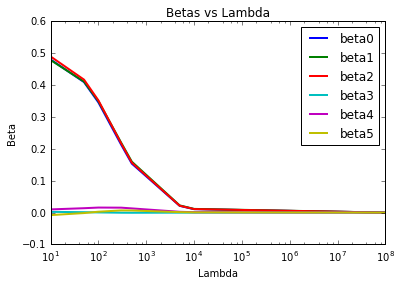

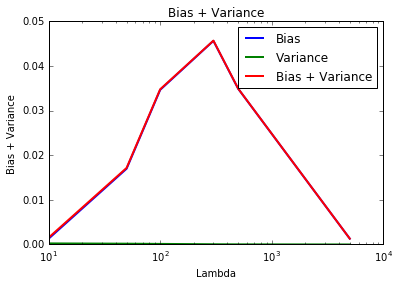

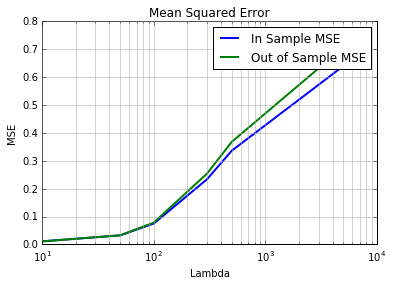

In [6]:
print_stats(X_wide[:IN,], X_wide[IN:,], Y_2_wide[:IN,], Y_2_wide[IN:], lambdas_to_test =[0, 10, 50, 100, 300, 500, 5000, 10000, 99999999])                                   